## Data analysis code for DIY suspension wizard
Version 2.0 - now in Python instead of MATLAB

Author: Valtteri Turkki


In [1]:
# Required packages are numpy and matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

### Short introduction

This Jypyter notebook is meant to be used for analyzing data obtained from mountain bike suspension with the DIY suspension wizard measurement apparatus ([more info here](https://wiki.aalto.fi/display/MEX/DIY+suspension+wizard+-+mountain+bike+suspension+data+logger)). The code draws some basic figures that allow the user to judge the suspension performance quickly. The ideal usage for downhill applications is to couple the measurment data with a video recording from the run and use those together to get a better overview of the performance.

When using the code, you should modify only the cell below to set the `path` and `filename` to have the wanted data being analyzed and set the correct travels by modifying the `fork_stroke` and `shock_stroke` variables.

In [9]:
# User-input: The path to the data and suspension specs
path = 'data/'
filename = 'RUN8.csv'
fork_stroke = 160 # Fork travel in mm
shock_stroke = 55 # Shock stroke in mm

In [6]:
# Load the data as numpy array
data = np.loadtxt(path+filename, skiprows=1, delimiter=',', unpack=False, dtype=None)

# Record the dimensions of the data array
n = data[:,0].size # Number of data points
m = data[0].size # Number of measured quantities

# Indicators for the run type
gps = False
hardtail = False

# Assign the data to correct variables according to the data array dimension m
print('Run type:')
if(m == 8):
    print('Full suspension without GPS')
    gps = False
    hardtail = False
    t = np.copy((data[:,0]))
    travel_f = np.copy((data[:,1]))
    travel_r = np.copy((data[:,2]))
    brake_f = np.copy((data[:,3]))
    brake_r = np.copy((data[:,4]))
    acc_x = np.copy((data[:,5]))
    acc_y = np.copy((data[:,6]))
    acc_z = np.copy((data[:,7]))
    
elif(m == 7):
    print('Hardtail without GPS')
    gps = False
    hardtail = True
    t = np.copy((data[:,0]))
    travel_f = np.copy((data[:,1]))
    brake_f = np.copy((data[:,2]))
    brake_r = np.copy((data[:,3]))
    acc_x = np.copy((data[:,4]))
    acc_y = np.copy((data[:,5]))
    acc_z = np.copy((data[:,6]))
    
elif(m == 12):
    print('Full suspension with GPS')
    gps = True
    hardtail = False
    t = np.copy((data[:,0]))
    travel_f = np.copy((data[:,1]))
    travel_r = np.copy((data[:,2]))
    brake_f = np.copy((data[:,3]))
    brake_r = np.copy((data[:,4]))
    acc_x = np.copy((data[:,5]))
    acc_y = np.copy((data[:,6]))
    acc_z = np.copy((data[:,7]))
    lat = np.copy((data[:,8]))
    lon = np.copy((data[:,9]))
    alt = np.copy((data[:,10]))
    speed = np.copy((data[:,11]))
    
elif(m == 11):
    print('Hardtail with GPS')
    gps = True
    hardtail = True
    t = np.copy((data[:,0]))
    travel_f = np.copy((data[:,1]))
    brake_f = np.copy((data[:,2]))
    brake_r = np.copy((data[:,3]))
    acc_x = np.copy((data[:,4]))
    acc_y = np.copy((data[:,5]))
    acc_z = np.copy((data[:,6]))
    lat = np.copy((data[:,7]))
    lon = np.copy((data[:,8]))
    alt = np.copy((data[:,9]))
    speed = np.copy((data[:,10]))
    
else:
    raise SystemExit('ERROR: Input data has unknown format. Number of columns is not 7, 8, 11 or 12.')
    
# Define a function for plotting colormap lines
def plotColorLine(x, y, f, xlbl='', ylbl=''):
    # This is quite directly adapted from matplotlib example
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(f.min(), f.max())
    lc = LineCollection(segments, cmap='plasma', norm=norm)
    # Set the values used for colormapping
    lc.set_array(f)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)
    
    axs.set_xlim(x.min(), x.max())
    axs.set_ylim(y.min(), y.max())
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()
    
def printHorizontalLine():
    print('---------------------------------------------------------------------------------------------------')
    return
    
print(' ')
print('Opened file "{}" which had {} data points of {} measurements'.format(filename, n, m))

Run type:
Full suspension without GPS
 
Opened file "RUN8.csv" which had 2343 data points of 8 measurements


 
Figures of travel usage, acceleration, braking and possible GPS values:
---------------------------------------------------------------------------------------------------
Used travel vs. z-acceleration:


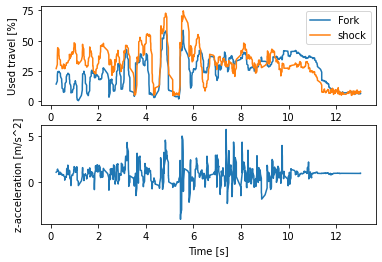

Fork vs. shock scatter plot:


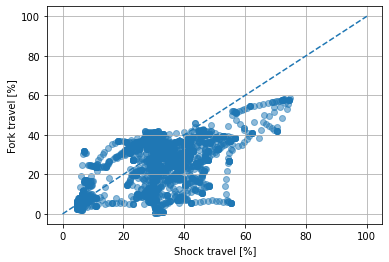

Travel usage distribution:


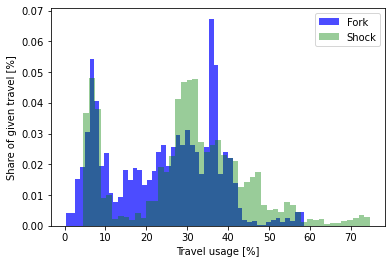

Rebound and compression:


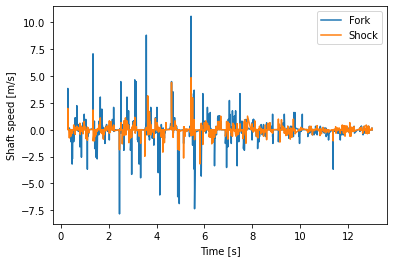

Braking vs. forward acceleration:


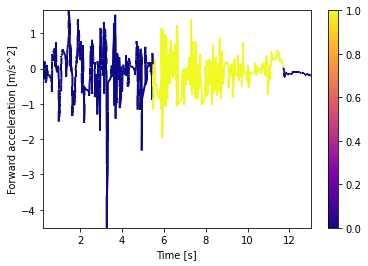

 
Calculated values:
---------------------------------------------------------------------------------------------------
Average used fork travel was 24.2 % and maximum was 58.6 %
Average used shock travel was 30.0 % and maximum was 74.7 %
Fastest fork compression was 10.6 m/s and rebound was 7.8 m/s
Fastest shock compression was 4.8 m/s and rebound was 3.2 m/s
Correlation between used shock travel and z-acceleration was 0.21
Correlation between used fork and shock travel was 0.61
Total braking amount was 42.4 % and braking balance (both brakes used) was 83.40 %
---------------------------------------------------------------------------------------------------


In [12]:
######### The actual data analysis ############
print(' ')
print('Figures of travel usage, acceleration, braking and possible GPS values:')
printHorizontalLine()

# Plot travel vs. acc_z
print('Used travel vs. z-acceleration:')
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, travel_f, label='Fork')
if(not hardtail):
    axs[0].plot(t, travel_r, label='shock')
axs[0].legend()
axs[0].set_ylabel('Used travel [%]')
#axs[0].xlabel('Time [s]')    
axs[1].plot(t, acc_z)
axs[1].set_ylabel('z-acceleration [m/s^2]')
axs[1].set_xlabel('Time [s]') 
plt.show()

# Plot travel f/r in scatter plot
if(not hardtail):
    print('Fork vs. shock scatter plot:')
    plt.figure
    plt.scatter(travel_r, travel_f, alpha=0.5)
    plt.plot(np.linspace(0,100,200), np.linspace(0,100,200), '--', label='Equal usage')
    plt.grid(True)
    plt.ylabel('Fork travel [%]')
    plt.xlabel('Shock travel [%]')
    plt.show()

# Plot the distribution of travel usage
print('Travel usage distribution:')
plt.figure
plt.hist(travel_f, 50, density=True, facecolor='b', alpha=0.7, label='Fork')
if(not hardtail):
    plt.hist(travel_r, 50, density=True, facecolor='g', alpha=0.4, label='Shock')
plt.xlabel('Travel usage [%]')
plt.ylabel('Share of given travel [%]')
plt.legend()
plt.show()

# Calculate derivative of the travel -> damper compression/rebound speed
epsilon = 1e-4 # Used as the threshold for too small time steps, more reliable that t[i+1] != t[i]
delta_f = travel_f[1:n] - travel_f[0:n-1]
delta_t = t[1:n] - t[0:n-1]
delta_f = delta_f[delta_t > epsilon]/delta_t[delta_t > epsilon]*fork_stroke/1000/100
t_diff = t[1:n]
t_diff = t_diff[delta_t > epsilon]
if(not hardtail):
    delta_r = travel_r[1:n] - travel_r[0:n-1]
    delta_r = delta_r[delta_t > epsilon]/delta_t[delta_t > epsilon]*shock_stroke/1000/100

# Plot compression/rebound
print('Rebound and compression:')
plt.figure
plt.plot(t_diff, delta_f, label='Fork')
if(not hardtail):
    plt.plot(t_diff, delta_r, label='Shock')
plt.xlabel('Time [s]')
plt.ylabel('Shaft speed [m/s]')
plt.legend()
plt.show()

# Plot braking vs. acc_x
print('Braking vs. forward acceleration:')
plotColorLine(t, -acc_x, brake_r, 'Time [s]', 'Forward acceleration [m/s^2]')

# Plot GPS track in 2D with speed
if(gps):
    print('The trail in 2D with speed:')
    plotColorLine(lat, lon, speed, 'Latitude [deg]', 'Longitude [deg]')
        
# Plot elevation vs. time with braking
if(gps):
    print('Elevation vs. time with braking:')
    plotColorLine(t, alt, brake_r, 'Time [s]', 'Elevation [m]')
    
# Plot speed vs. time with braking
if(gps):
    print('Speed vs. time with braking:')
    plotColorLine(t, speed, brake_r, 'Time [s]', 'Speed [km/h]')

    
# Calculate and print:
print(' ')
print('Calculated values:')
printHorizontalLine()

print('Average used fork travel was {:.1f} % and maximum was {:.1f} %'.format(np.mean(travel_f), np.max(travel_f)))
if(not hardtail):
    print('Average used shock travel was {:.1f} % and maximum was {:.1f} %'.format(np.mean(travel_r), np.max(travel_r)))
    
print('Fastest fork compression was {:.1f} m/s and rebound was {:.1f} m/s'.format(np.max(delta_f), -np.min(delta_f)))
if(not hardtail):
    print('Fastest shock compression was {:.1f} m/s and rebound was {:.1f} m/s'.format(np.max(delta_r), -np.min(delta_r)))
    
    print('Correlation between used shock travel and z-acceleration was {:.2f}'.format(np.corrcoef(travel_r, acc_z)[1,0]))
    print('Correlation between used fork and shock travel was {:.2f}'.format(np.corrcoef(travel_f, travel_r)[1,0]))

both_brakes = brake_r[brake_f == 1]
n_brake = np.sum(both_brakes)/float(n)
nr_brake = brake_r[brake_f == 0]
nf_brake = brake_f[brake_r == 0]
bal_brake = 1-(np.sum(nr_brake) + np.sum(nf_brake))/float(n)
print('Total braking amount was {:.1f} % and braking balance (both brakes used) was {:.2f} %'.format(n_brake*100, bal_brake*100))
printHorizontalLine()


### About the calculated values

- Averages tell generally about suspension usage and maximum values give the same result as sag indicators.
- Compression and rebound speeds give hint about the balance of those settings, but they should be used in conjunction with the rider feel as the shock values do not directly correspond to rear wheel travel as the leverage ration of bike frames is generally not equal to one.
    - Correlation between fork and shock furthe helps in the susoension balance comparisons.
- Correlation between rear shock travel and frame z-acceleration gives hint about the level of damping of the bike. Values close to zero yields blush suspension (rear shock moves a lot while the frame stays rather still) and values near one mean that suspension gives the hits through to the frame quite much.
- Total braking gives an idea how much you use brakes and the balance tells how often you used both brakes simultaneously.